In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
df = pd.read_excel("/content/Sample Data for shortlisting.xlsx")

In [ ]:
num_rows, num_columns = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 810
Number of columns: 19


In [ ]:
print("\nS.No      ColumnName                    Datatype")
for k,(i,j) in enumerate(df.dtypes.items(),start=1):
  print(f"{k:<10}{i:<30}{j}")


S.No      ColumnName                    Datatype
1         S. No.                        int64
2         City                          object
3         Gender                        object
4         Marital Status                object
5         Age                           object
6         Education                     object
7         Role                          object
8         Number of investors in family int64
9         Household Income              object
10        Percentage of Investment      object
11        Source of Awareness about Investmentobject
12        Knowledge level about different investment productint64
13        Knowledge level about sharemarketint64
14        Knowledge about Govt. Schemes int64
15        Investment Influencer         object
16        Investment Experience         object
17        Risk Level                    object
18        Return Earned                 object
19        Reason for Investment         object


In [ ]:
for column in df.columns:
    if column != 'S. No.':
      unique_values = df[column].unique()
      print(f"\nUnique list of values for column '{column}':")
      for i,value in enumerate(unique_values):
          print(i+1,value)


Unique list of values for column 'City':
1 New York
2 Seattle
3 San Francisco
4 Memphis
5 Houston

Unique list of values for column 'Gender':
1 Men
2 Women

Unique list of values for column 'Marital Status':
1 Never Married
2 Married

Unique list of values for column 'Age':
1 nan

Unique list of values for column 'Education':
1 Secondary
2 Middle
3 Teritary
4 Uneducated
5 Primary

Unique list of values for column 'Role':
1 Marketing and Sales Executive
2 Advertising and Promotion Executive
3 Training and Development Executive
4 Computer and Information System Executive
5 Top Executives

Unique list of values for column 'Number of investors in family':
1 2
2 5
3 3
4 1
5 4

Unique list of values for column 'Household Income':
1 nan

Unique list of values for column 'Percentage of Investment':
1 Don't Want to Reveal
2 Above 26%
3 16% to 20%
4 21% to 25%
5 Upto 5%
6 11% to 15%
7 6% to 10%

Unique list of values for column 'Source of Awareness about Investment':
1 Television
2 Workers
3 Fa

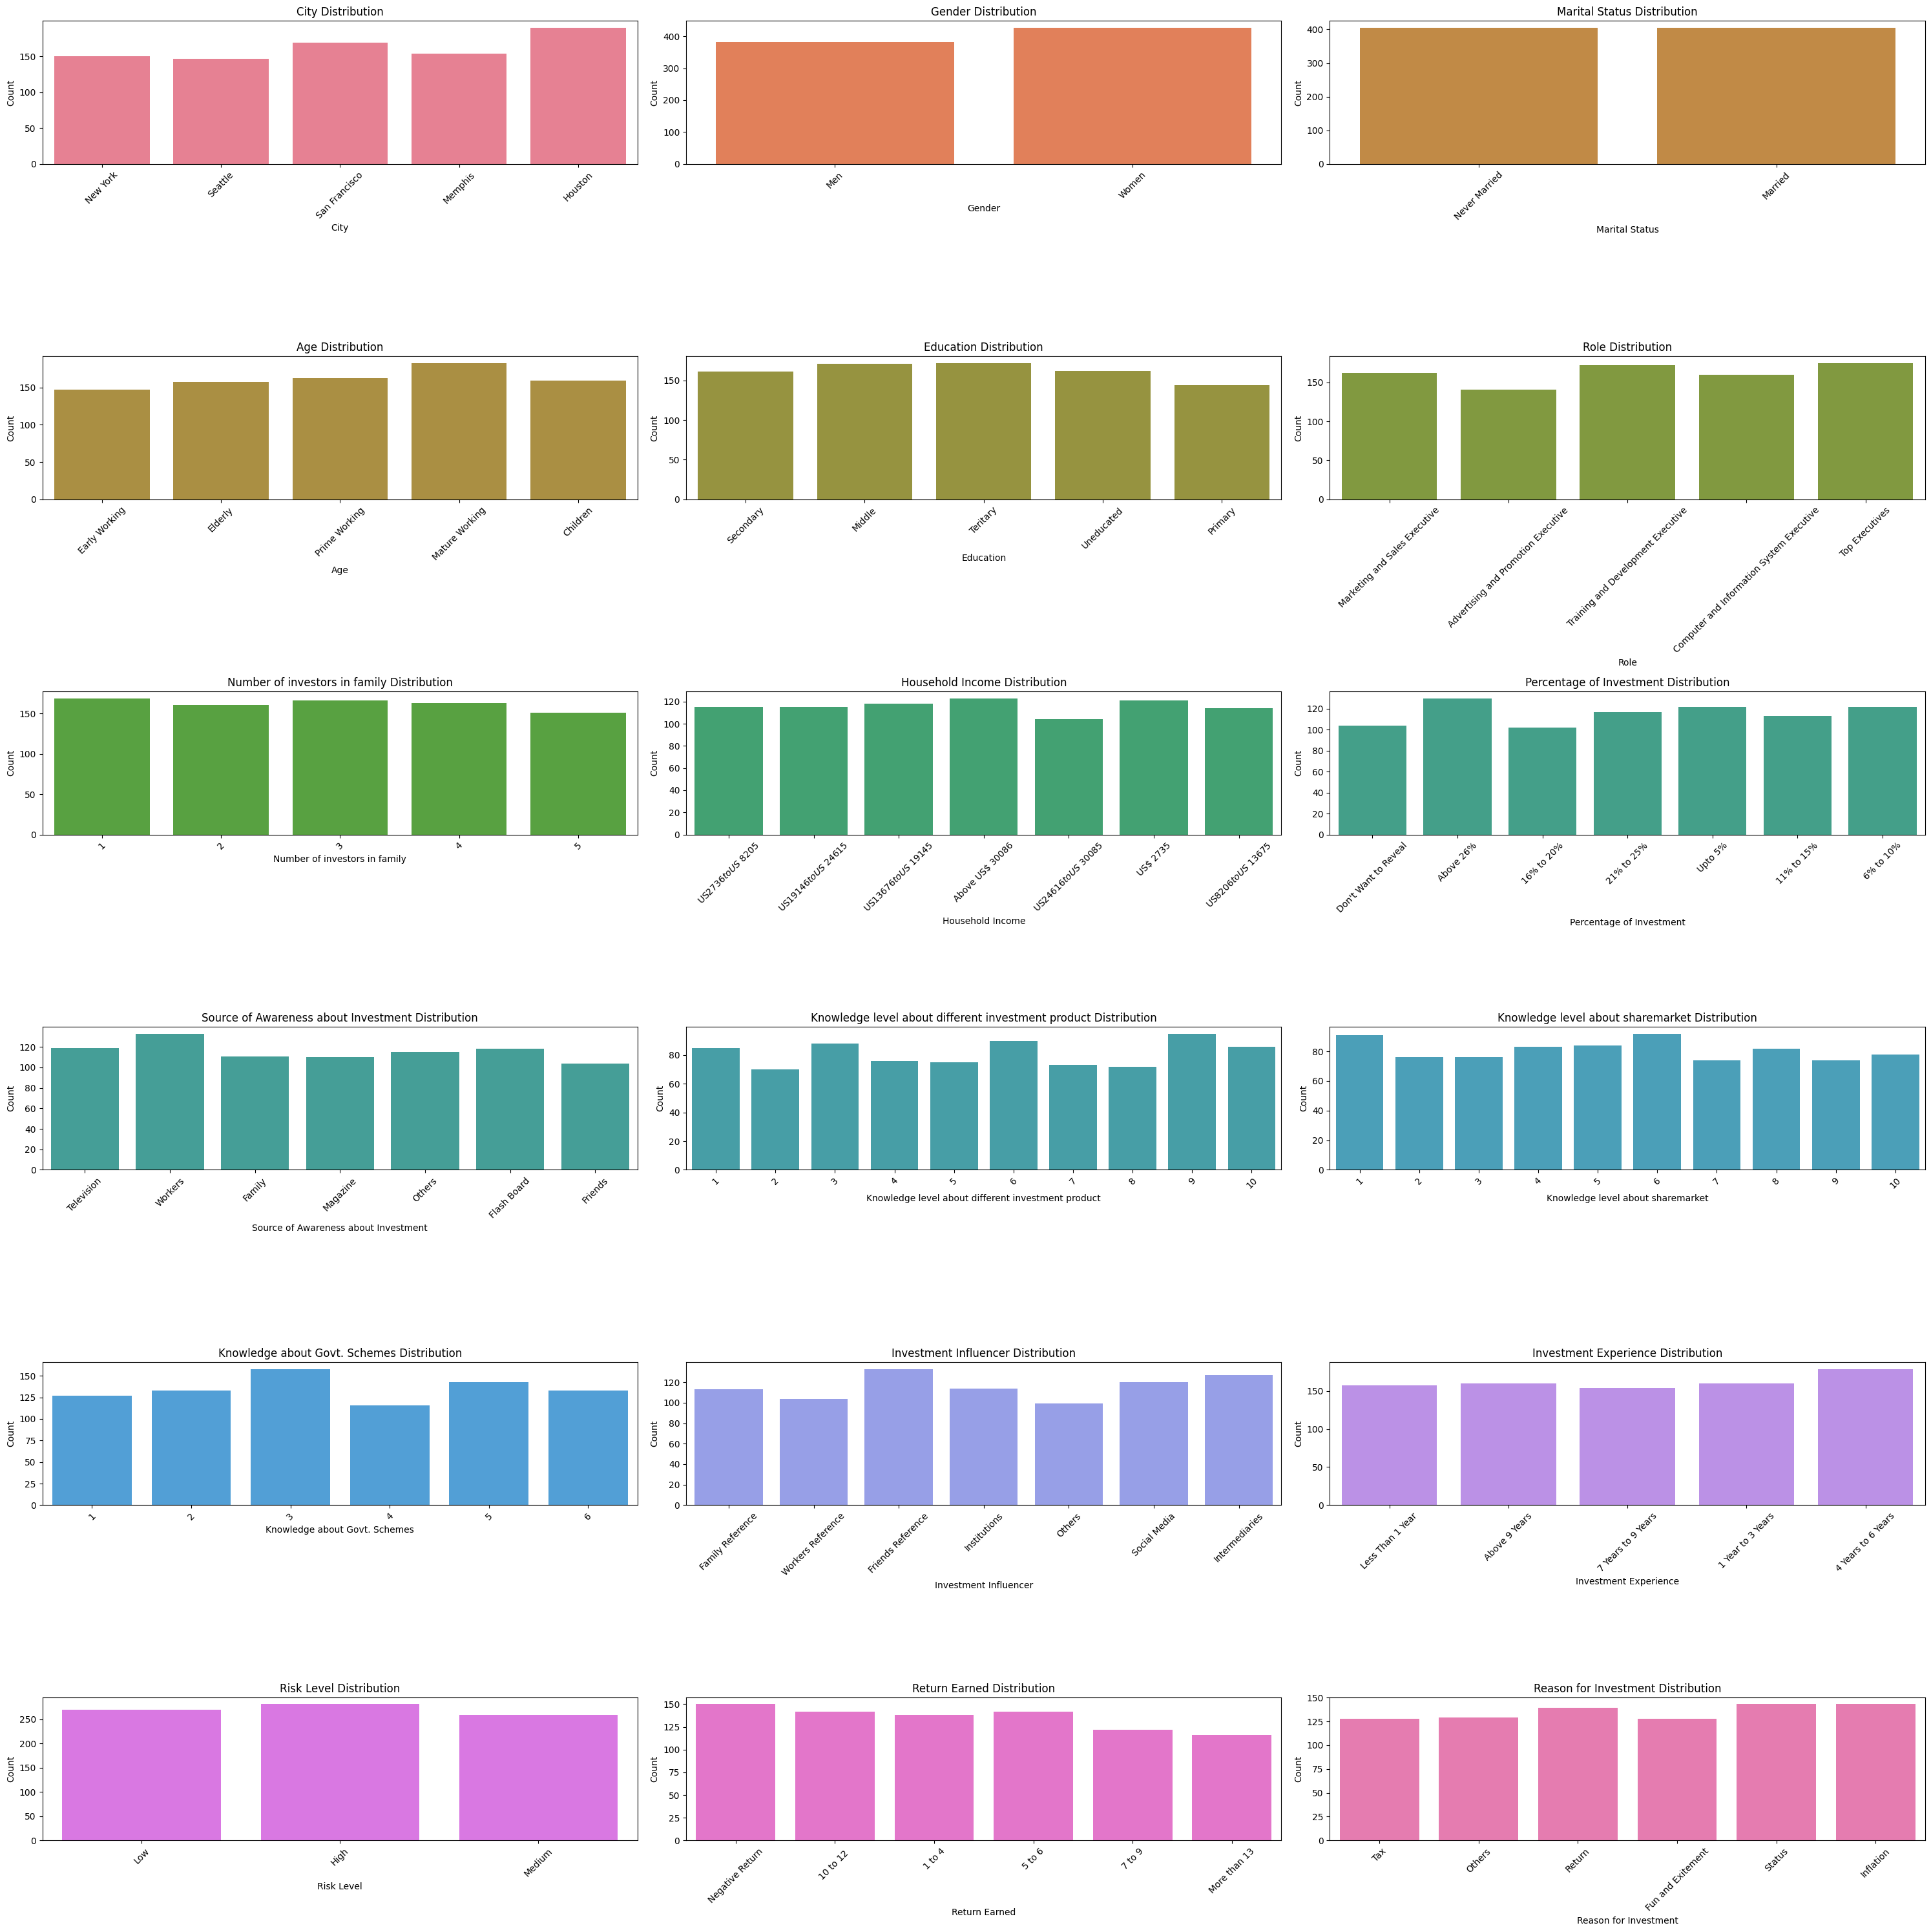

In [ ]:
df.columns = df.columns.str.strip()

fig, axes = plt.subplots(6, 3, figsize=(30, 30))
axes = axes.flatten()

palette = sns.color_palette("husl", len(df.columns) - 1)

warnings.filterwarnings("ignore")

for i, column in enumerate(df.columns):
    if column != 'S. No.':
        ax = axes[i-1]
        sns.countplot(x=column, data=df, ax=ax, palette=palette[i-1:i])
        ax.set_title(f'{column} Distribution')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


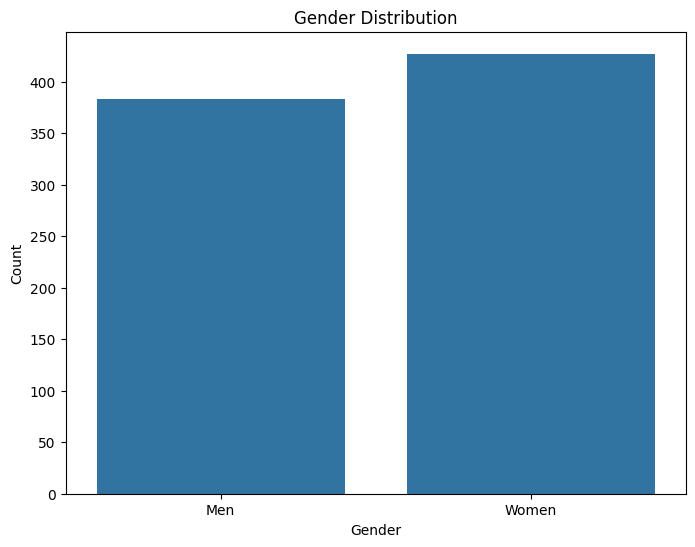

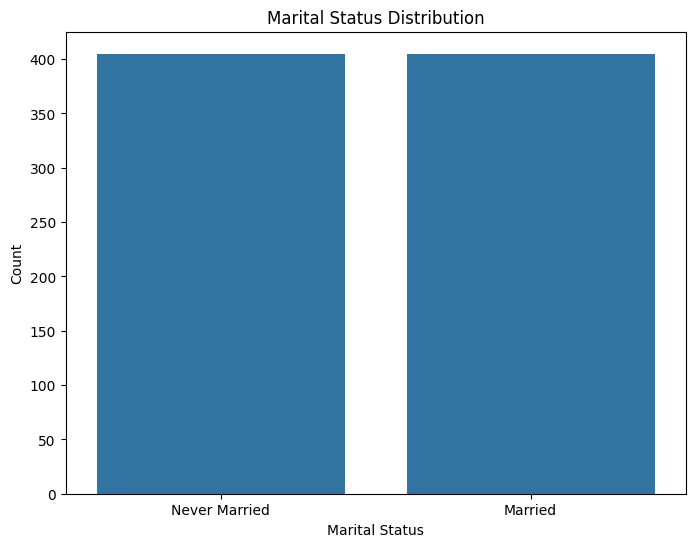

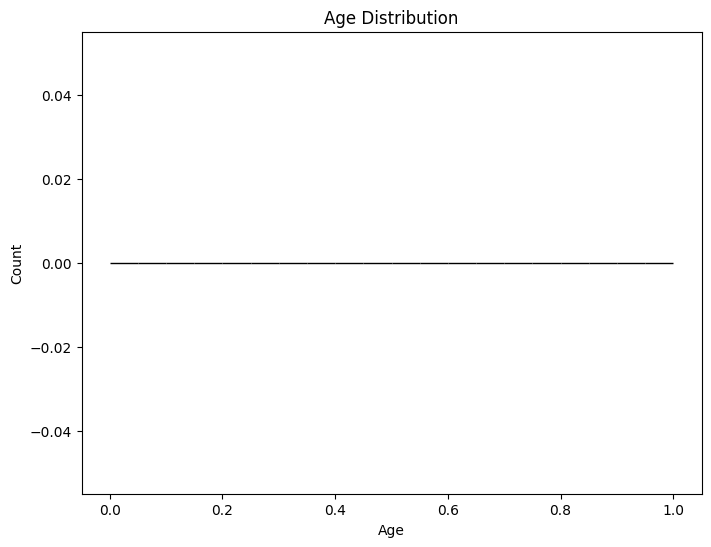

In [ ]:
# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Marital status distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Marital Status')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Age distribution
# Since the 'Age' column is of object type, you may need to convert it to numeric first
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
def clean_income(income):
    if isinstance(income, str):
        income = income.replace('US$', '').replace(',', '').split(' to ')
        income = [int(val.strip()) for val in income]
        if len(income) == 1:
            return income[0]
        else:
            return sum(income) / 2
    else:
        return income

df['Household Income'] = df['Household Income'].apply(clean_income)

print(df['Household Income'])


0       5470.5
1      21880.5
2       5470.5
3      21880.5
4      16410.5
        ...   
805     2735.0
806        inf
807    16410.5
808    21880.5
809        inf
Name: Household Income, Length: 810, dtype: float64


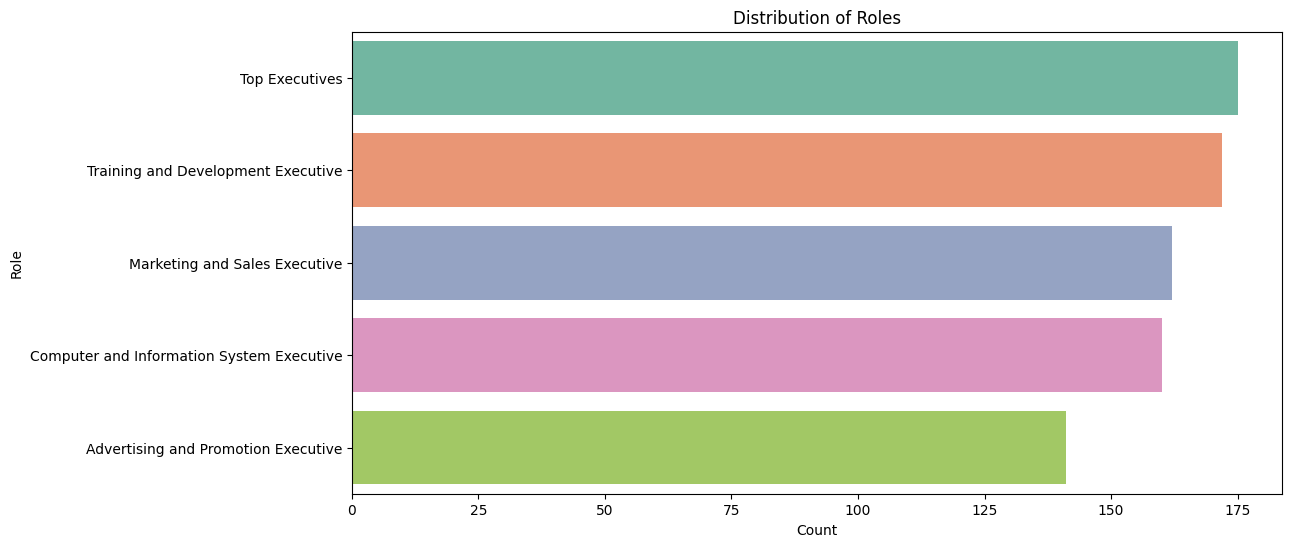

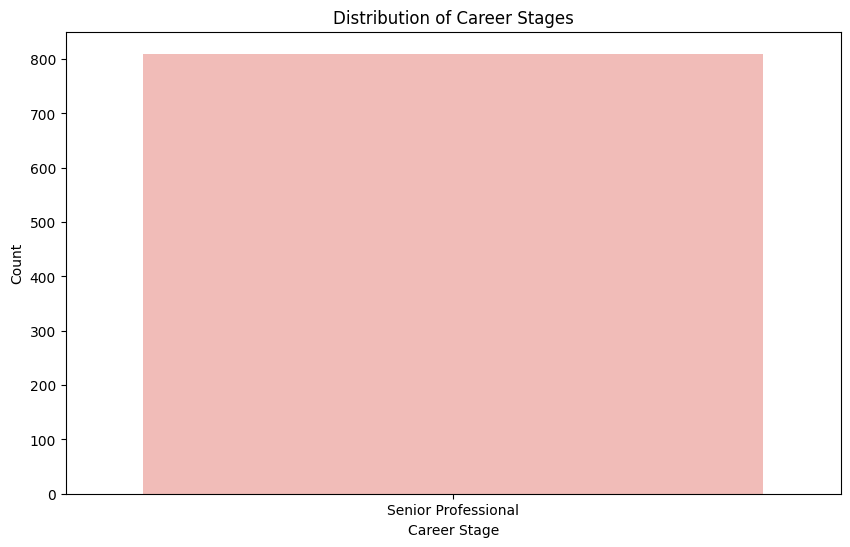

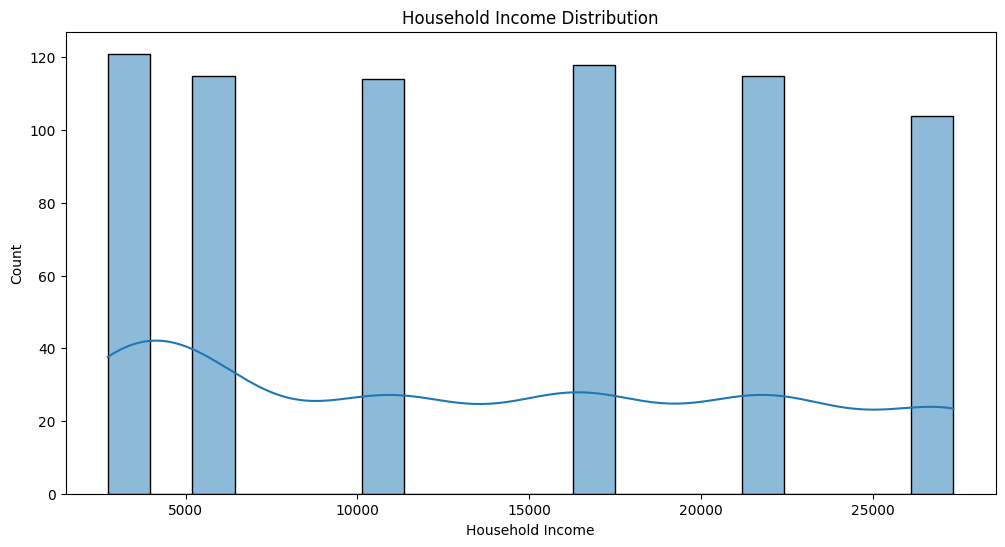

In [ ]:
# Roles distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Role', order=df['Role'].value_counts().index, palette='Set2')
plt.title('Distribution of Roles')
plt.xlabel('Count')
plt.ylabel('Role')
plt.show()

# Career stages distribution
def categorize_age(age):
    if age < 25:
        return 'Student'
    elif 25 <= age < 35:
        return 'Young Professional'
    elif 35 <= age < 50:
        return 'Mid-level Professional'
    else:
        return 'Senior Professional'

df['Career Stage'] = df['Age'].apply(categorize_age)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Career Stage', order=df['Career Stage'].value_counts().index, palette='Pastel1')
plt.title('Distribution of Career Stages')
plt.xlabel('Career Stage')
plt.ylabel('Count')
plt.show()

# Household Income Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Household Income', bins=20, palette='Blues', kde=True)
plt.title('Household Income Distribution')
plt.xlabel('Household Income')
plt.ylabel('Count')
plt.show()


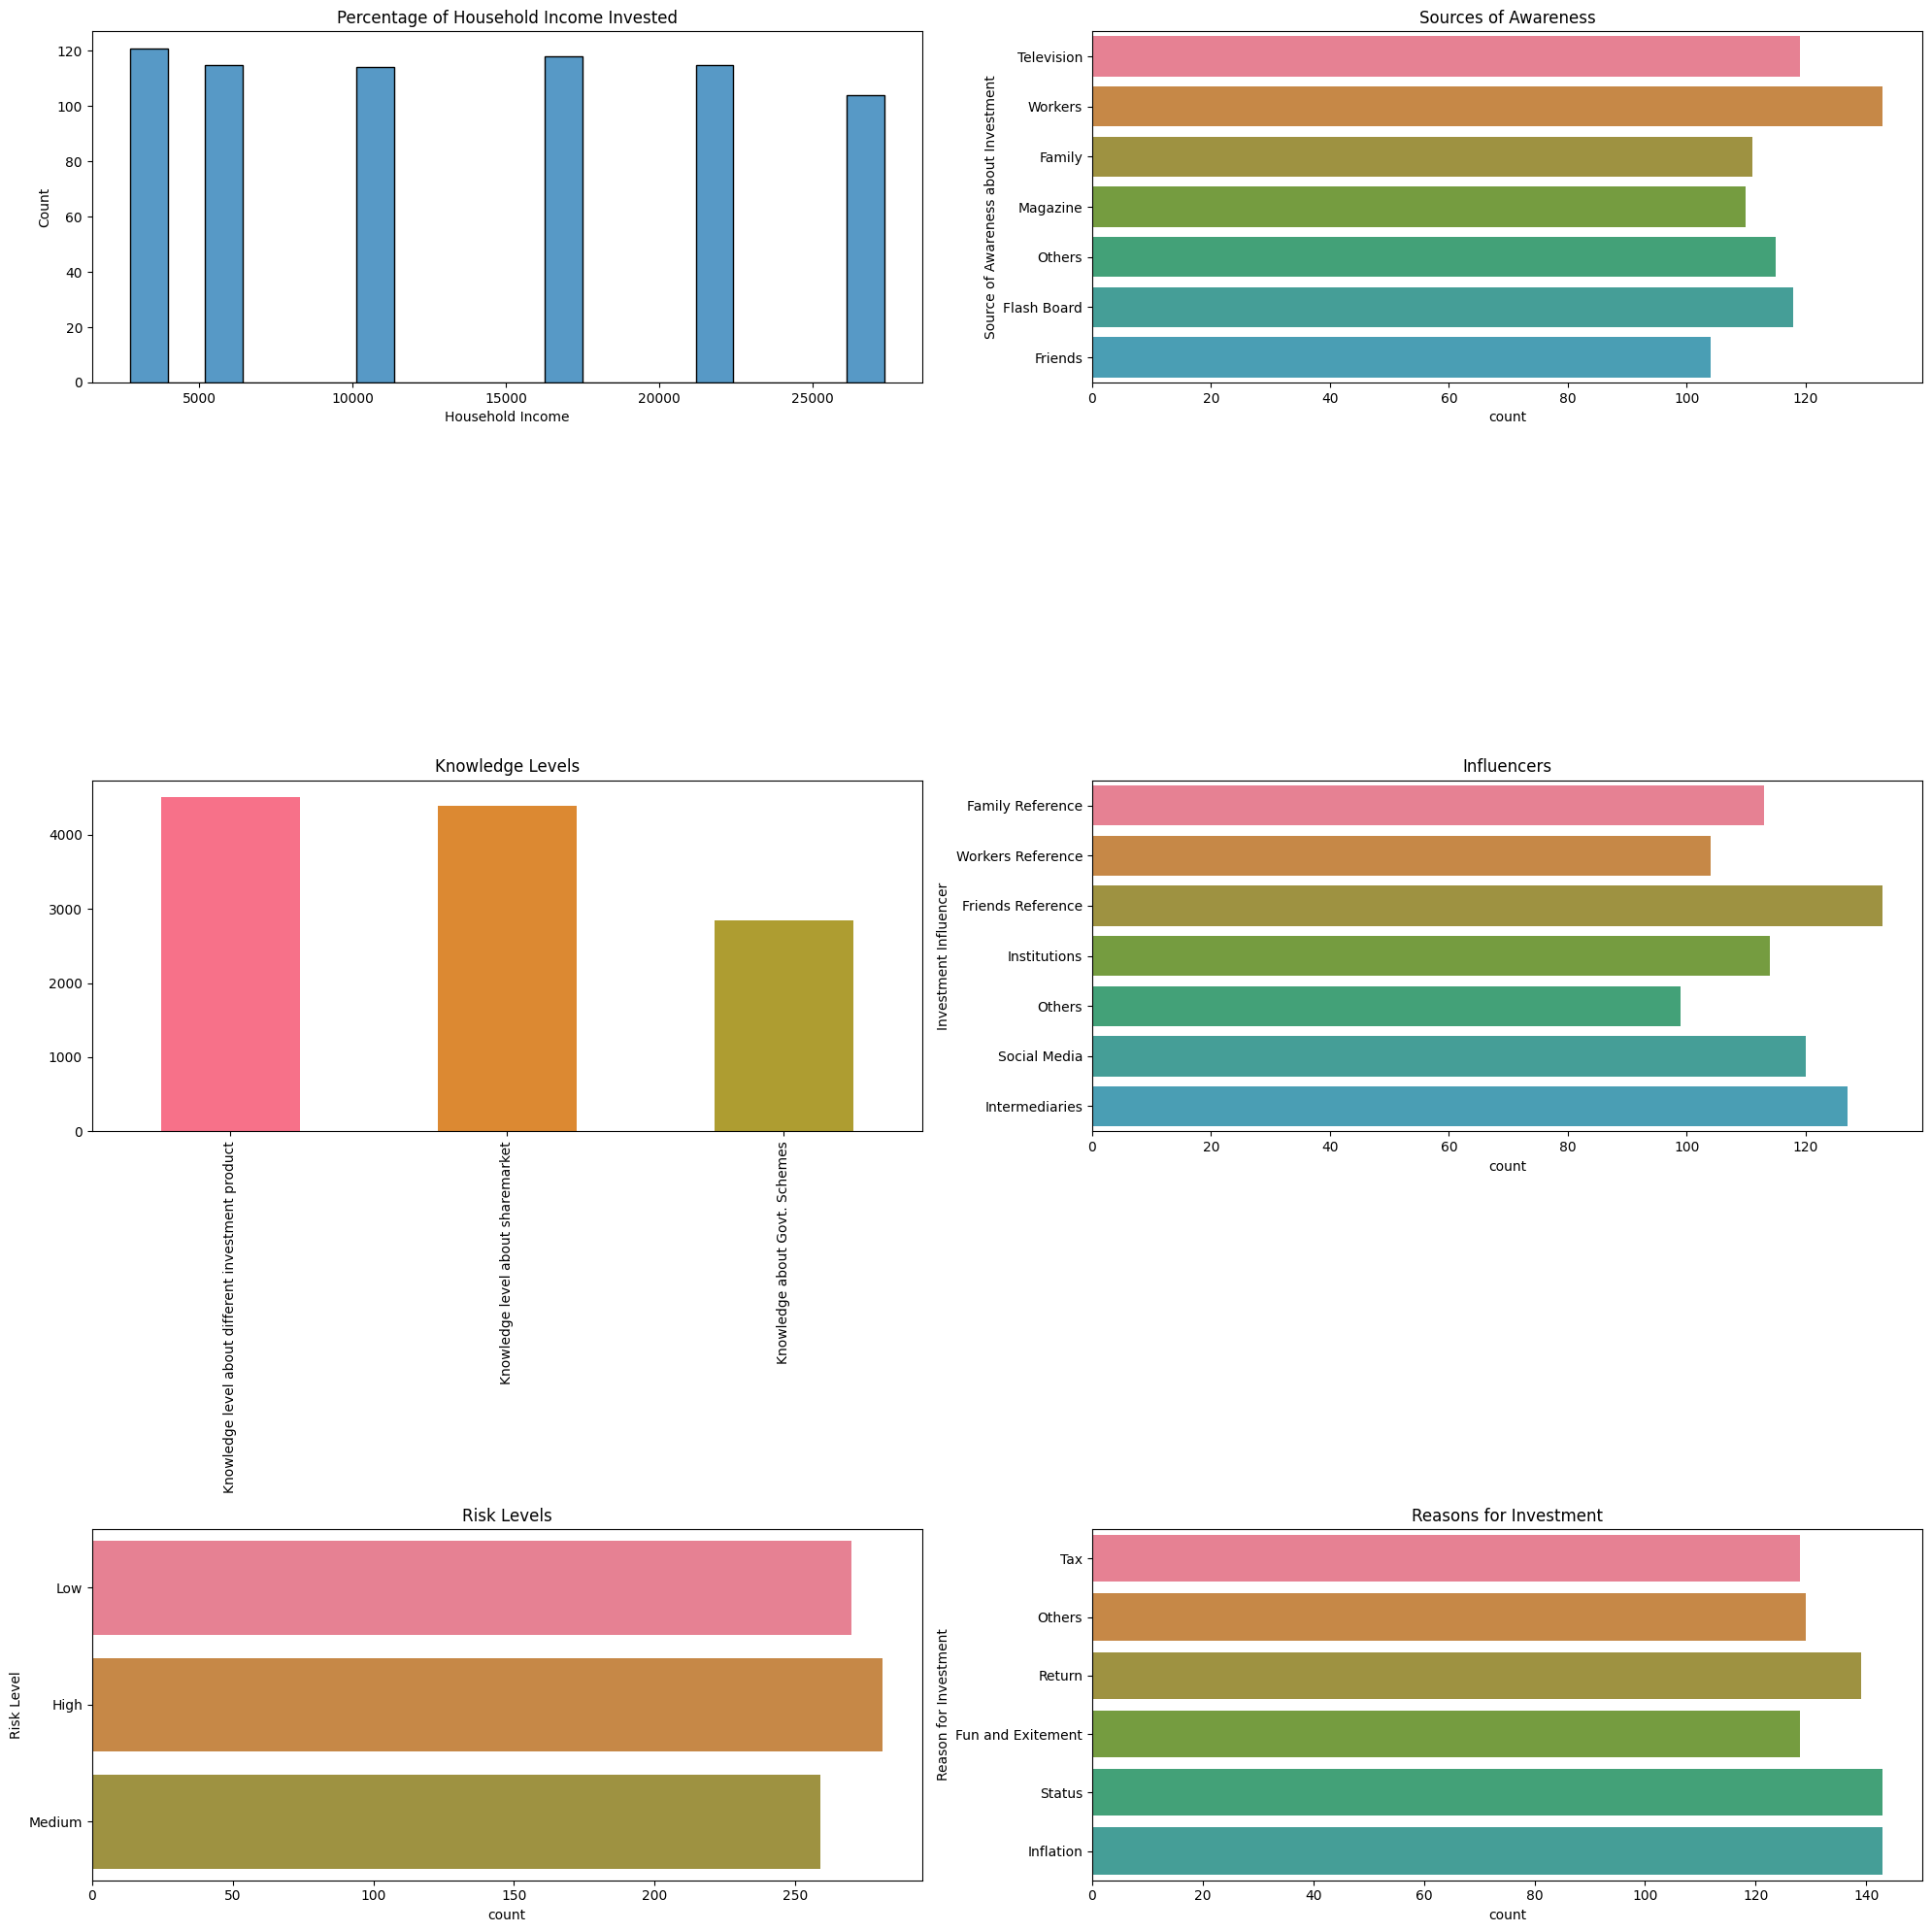

In [ ]:
custom_palette = sns.color_palette("husl", 10)

# Visualization
plt.figure(figsize=(20, 20))

# Percentage of household income invested
plt.subplot(3, 2, 1)
sns.histplot(data=df, x='Household Income', bins=20, palette=custom_palette)
plt.title('Percentage of Household Income Invested')

# Sources of awareness about investments
plt.subplot(3, 2, 2)
sns.countplot(y='Source of Awareness about Investment', data=df, palette=custom_palette)
plt.title('Sources of Awareness')

# Knowledge levels
plt.subplot(3, 2, 3)
knowledge_cols = ['Knowledge level about different investment product', 'Knowledge level about sharemarket', 'Knowledge about Govt. Schemes']
knowledge_data = df[knowledge_cols].sum()
knowledge_data.plot(kind='bar', color=custom_palette)
plt.title('Knowledge Levels')

# Influencers
plt.subplot(3, 2, 4)
sns.countplot(y='Investment Influencer', data=df, palette=custom_palette)
plt.title('Influencers')

# Risk levels
plt.subplot(3, 2, 5)
sns.countplot(y='Risk Level', data=df, palette=custom_palette)
plt.title('Risk Levels')

# Reasons for investment
plt.subplot(3, 2, 6)
sns.countplot(y='Reason for Investment', data=df, palette=custom_palette)
plt.title('Reasons for Investment')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
df = pd.read_excel("Sample Data for shortlisting.xlsx")
df1=df[['City' ,'Role','Investment Influencer','Reason for Investment']]

# Example DataFrame


# Perform one-hot encoding
df1 = pd.get_dummies(df1)
df1 = df1.astype(int)

label_encoder = LabelEncoder()
df1['Gender'] = label_encoder.fit_transform(df['Gender'])
df1['Marital Status'] = label_encoder.fit_transform(df['Marital Status'])
df1['Age'] = label_encoder.fit_transform(df['Age'])
df1['Education'] = label_encoder.fit_transform(df['Education'])
df1['Household Income'] = label_encoder.fit_transform(df['Household Income'])
df1['Percentage of Investment'] = label_encoder.fit_transform(df['Percentage of Investment'])
df1['Source of Awareness about Investment'] = label_encoder.fit_transform(df['Source of Awareness about Investment'])
df1['Investment Experience'] = label_encoder.fit_transform(df['Investment Experience'])
df1['Risk Level'] = label_encoder.fit_transform(df['Risk Level'])
df1['Return Earned'] = label_encoder.fit_transform(df['Return Earned'])


In [ ]:
df_w = df1.drop(columns=['Return Earned'])
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(df_w, df1['Return Earned'])

coefficients = model.coef_
rel= coefficients[4]
print("Coefficients:", len(coefficients))
plt.figure(figsize=(20, 20))
sns.heatmap(df1.corr(), annot=True)
columns = list(df1.columns)
columns.remove('Return Earned')
print(columns)
sns.barplot(x=columns,y=rel)
import matplotlib.pyplot as plt
plt.xticks(columns, rotation=90)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score




# Split the data into features (X) and target variable (y)
X = df1.drop(columns=['Return Earned'])
y = df1['Return Earned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Perform prediction on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize base classifiers
decision_tree = DecisionTreeClassifier(random_state=42)
svm = SVC(kernel='linear', random_state=42)
logistic_regression = LogisticRegression(random_state=42)

# Initialize Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('decision_tree', decision_tree),
        ('svm', svm),
        ('logistic_regression', logistic_regression)
    ],
    voting='hard'  # 'hard' for majority voting
)

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Perform prediction on the test set
y_pred = voting_classifier.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the Iris dataset


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the model
svm_classifier.fit(X_train, y_train)

# Perform prediction on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
#Sample prediction
x1=np.array(df1.iloc[0][:-1])
print(x1)
x1=[x1]
pred = voting_classifier.predict(x1)
print(pred)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

#Grid search for Random forest

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#Grid search for SVM
# Initialize Support Vector Classifier
svm_classifier = SVC()

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', 'sigmoid'
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']  # Kernel type
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Ensemble approach
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize base classifiers
decision_tree = DecisionTreeClassifier(random_state=42)
svm = SVC(kernel='linear', random_state=42)
logistic_regression = LogisticRegression(random_state=42)

# Initialize Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('decision_tree', decision_tree),
        ('svm', svm),
        ('logistic_regression', logistic_regression)
    ],
    voting='hard'  # 'hard' for majority voting
)

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Perform prediction on the test set
y_pred = voting_classifier.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
